In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img
import os

# trains_dirname = os.path.join('C:/Users/Beppy/model_tutorial/GAN/dataset/labeled/trains')
# valids_dirname = os.path.join('C:/Users/Beppy/model_tutorial/GAN/dataset/labeled/valids')
trains_dirname = os.path.join('..', 'dataset', 'labeled', 'trains')
valids_dirname = os.path.join('..', 'dataset', 'labeled', 'valids')

trains_generator = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=20.0,
    #shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
valids_generator = ImageDataGenerator()

trains_generator = trains_generator.flow_from_directory(
    trains_dirname,
    target_size=(32,32),
    batch_size=32,
    class_mode='binary'
)
valids_generator = valids_generator.flow_from_directory(
    valids_dirname,
    target_size=(32,32),
    batch_size=32,
    class_mode='binary'
)

Found 83 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


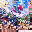

0.0

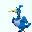

0.0

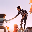

0.0

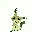

0.0

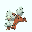

0.0

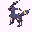

0.0

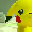

1.0

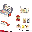

0.0

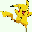

1.0

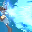

0.0

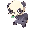

0.0

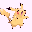

1.0

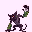

0.0

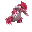

0.0

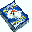

0.0

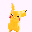

1.0

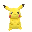

1.0

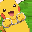

1.0

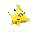

1.0

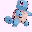

0.0

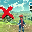

0.0

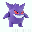

0.0

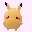

1.0

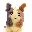

0.0

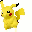

1.0

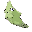

0.0

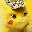

1.0

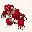

0.0

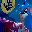

0.0

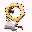

0.0

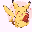

1.0

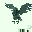

0.0

In [3]:
generated = trains_generator.next()
images = generated[0]
labels = generated[1]
for i, image in enumerate(images):
    display(array_to_img(image))
    display(labels[i])

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

model = Sequential()

model.add(SeparableConv2D(32, kernel_size=3, padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(8, kernel_size=5, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mae'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', 'mae'])

model.summary()






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        155       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 16, 16, 32)        1344      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 8, 8, 16)      

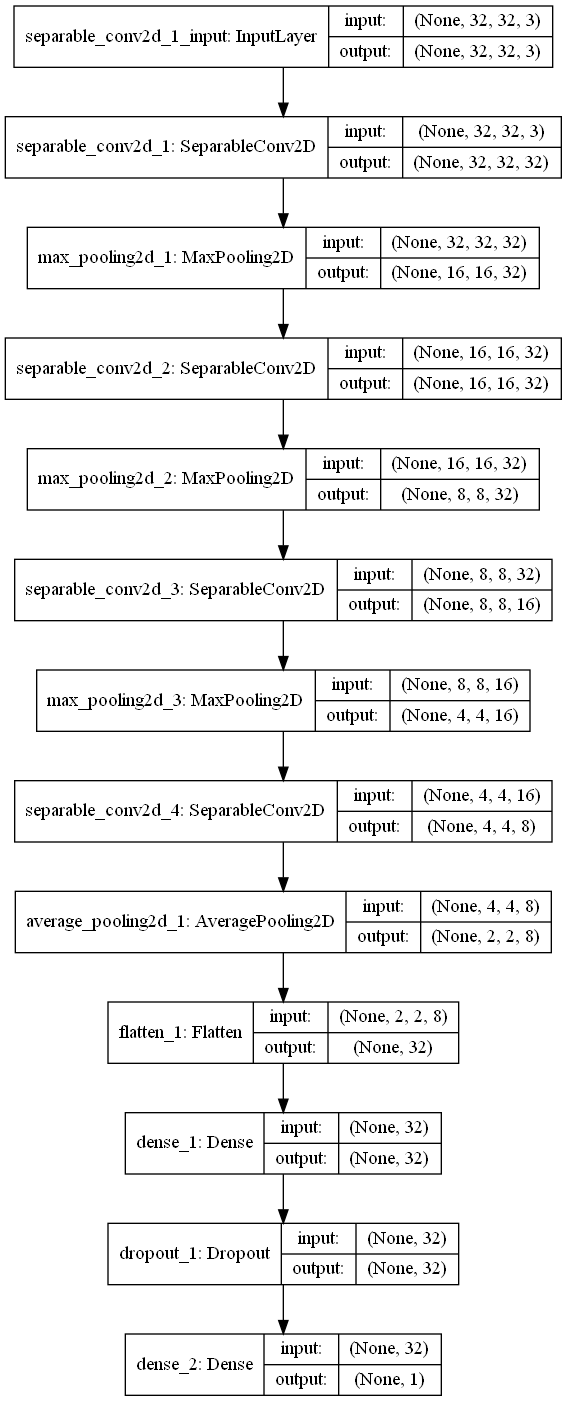

In [5]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

Image(model_to_dot(model, show_shapes=True).create(prog='dot', format='png'))

In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

model_filename = os.path.join('models', 'finding-pikachu_model_{val_loss:.2f}.h5')

model.fit_generator(
    trains_generator,
    validation_data=valids_generator,
    steps_per_epoch=100,
    epochs=100,
    callbacks = [
        TensorBoard(log_dir='tflogs'),
        EarlyStopping(patience=100, monitor='val_loss'),
        ModelCheckpoint(model_filename, monitor='val_loss', save_best_only=True),
    ]
)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6300 - acc: 0.6341 - mean_absolute_error: 0.4475 - val_loss: 5.3330 - val_acc: 0.6667 - val_mean_absolute_error: 0.3333
Epoch 2/100
100/100 [==============================] - 5s 49ms/step - loss: 0.3405 - acc: 0.8394 - mean_absolute_error: 0.2399 - val_loss: 1.7811 - val_acc: 0.8889 - val_mean_absolute_error: 0.1111
Epoch 3/100
100/100 [==============================] - 5s 51ms/step - loss: 0.2283 - acc: 0.9093 - mean_absolute_error: 0.1440 - val_loss: 1.7714 - val_acc: 0.8889 - val_mean_absolute_error: 0.1111
Epoch 4/100
100/100 [==============================] - 5s 51ms/step - loss: 0.2224 - acc: 0.9189 - mean_absolute_error: 0.1362 - val_loss: 0.4428 - val_acc: 0.9722 - val_mean_absolute_error: 0.0278
Epoch 5/100
100/100 [==============================] - 5s 53ms/step - loss: 0.1867 - ac

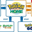

array([[0.]], dtype=float32)

In [8]:

from keras.preprocessing.image import load_img, img_to_array
import numpy as np

predicting_filename = os.path.join('..', 'dataset', 'reshaped', '1047.jpg')
predicting_image = load_img(predicting_filename).resize((32, 32))
predicting_array = img_to_array(predicting_image) / 255
display(predicting_image)
predicted = model.predict(np.array([
    predicting_array
]))
display(predicted)

In [9]:
import glob
import os
from keras.preprocessing.image import load_img, img_to_array
import shutil

predicting_dirname = os.path.join('..', 'dataset', 'reshaped', '*')
predicted_dirname = os.path.join('..', 'dataset', 'predicted_auto2')
for i, file in enumerate(glob.glob(predicting_dirname)):
    image =load_img(file).resize((32, 32))
    array = img_to_array(image) / 255
    predicted = model.predict(np.array([
        array
    ]))
    prob = int(predicted[0][0]*100)
    print(f'file={file}, pikachu?={prob}%')

    if prob >= 99:
        shutil.copy(file, predicted_dirname)

file=..\dataset\reshaped\1.jpg, pikachu?=100%
file=..\dataset\reshaped\10.jpg, pikachu?=93%
file=..\dataset\reshaped\100.jpg, pikachu?=100%
file=..\dataset\reshaped\1000.jpg, pikachu?=0%
file=..\dataset\reshaped\1001.jpg, pikachu?=0%
file=..\dataset\reshaped\1002.jpg, pikachu?=0%
file=..\dataset\reshaped\1003.jpg, pikachu?=0%
file=..\dataset\reshaped\1004.jpg, pikachu?=0%
file=..\dataset\reshaped\1005.jpg, pikachu?=99%
file=..\dataset\reshaped\1006.jpg, pikachu?=0%
file=..\dataset\reshaped\1007.jpg, pikachu?=9%
file=..\dataset\reshaped\1008.jpg, pikachu?=0%
file=..\dataset\reshaped\1009.jpg, pikachu?=12%
file=..\dataset\reshaped\101.jpg, pikachu?=99%
file=..\dataset\reshaped\1010.jpg, pikachu?=99%
file=..\dataset\reshaped\1011.jpg, pikachu?=0%
file=..\dataset\reshaped\1012.jpg, pikachu?=0%
file=..\dataset\reshaped\1013.jpg, pikachu?=0%
file=..\dataset\reshaped\1014.jpg, pikachu?=0%
file=..\dataset\reshaped\1015.jpg, pikachu?=1%
file=..\dataset\reshaped\1016.jpg, pikachu?=0%
file=..\dat

In [1]:
test = os.path.join('..', 'dataset', 'labeled', 'trains')
print(os.path.exists(test))

True


In [32]:
print(len(os.listdir(trains_dirname)))

2


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1073421080307535407,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7055710618
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9530456941201988540
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"]